# "Unveiling Insights: A Data-Driven Exploration of Restaurants"

** LEVEL-2 **

# Data Cleaning

In [25]:
#Importing important libraries and csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from wordcloud import WordCloud
import folium
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [26]:
#Dealing the null-values in Cuisines using mode
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


* I have successfully completed all operations in Level-1. Here, I focused on handling all empty cells before diving straight into Level-2 tasks.

# Task 1: Restaurant Ratings
* Analyze the distribution of aggregate
ratings and determine the most common
rating range.
* Calculate the average number of votes
received by restaurants.

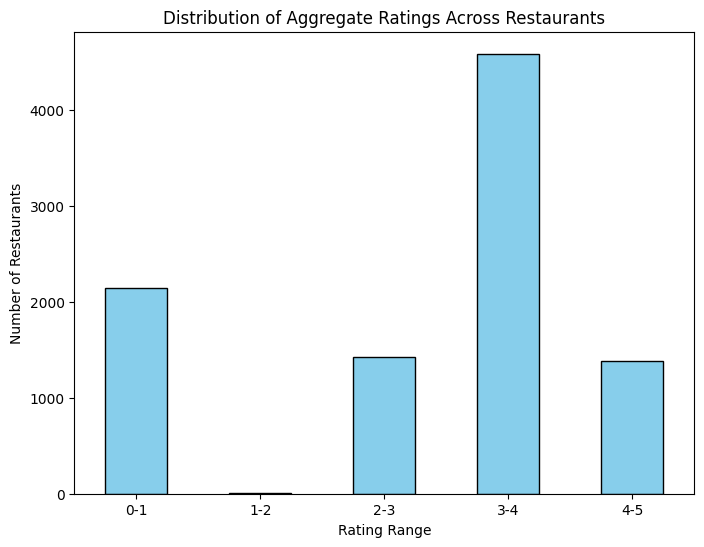

The most common rating range is 3-4 with 4590 restaurants.


In [27]:
# Define rating ranges
bins = [0,1,2,3,4,5]
labels = ['0-1','1-2','2-3','3-4','4-5']
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, right=False)

# Count the occurrences of each rating range
rating_range_counts = df['Rating Range'].value_counts().sort_index()

# Plot the distribution of rating ranges using a bar chart
plt.figure(figsize=(8, 6))
rating_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings Across Restaurants')
plt.xticks(rotation=0)
plt.show()

# Display the most common rating range
most_common_range = rating_range_counts.idxmax()
most_common_count = rating_range_counts.max()

print(f"The most common rating range is {most_common_range} with {most_common_count} restaurants.")

In [28]:
average_votes = df['Votes'].mean()

#Display the output
print(f"The average number of votes received by restaurants is {average_votes:.2f}.")

The average number of votes received by restaurants is 156.91.


# Task 2: Cuisine Combination
* Identify the most common combinations of cuisines in the dataset.
* Determine if certain cuisine combinations tend to have higher ratings.

In [29]:
#Split the 'Cuisines' into individual and remove empty values
cuisines_split = df['Cuisines'].astype(str).str.split(',').apply(lambda x: [cuisine.strip() for cuisine in x if isinstance(cuisine, str)])

#Generate all combinations of cuisines across all restaurant
all_combinations = cuisines_split.apply(lambda x: [comb for comb in combinations(sorted(x), 2)] if len(x) > 1 else [])

#Flatten the list of combinations
flat_combinations = [comb for sublist in all_combinations for comb in sublist]

#Count the occurrences of each cuisine combination
combination_counts = pd.Series(flat_combinations).value_counts()

# Display the output
print("Most Common Cuisine Combinations:")
print(combination_counts.head())

Most Common Cuisine Combinations:
(Chinese, North Indian)        1784
(Mughlai, North Indian)         832
(Fast Food, North Indian)       485
(Continental, North Indian)     468
(Chinese, Fast Food)            466
Name: count, dtype: int64


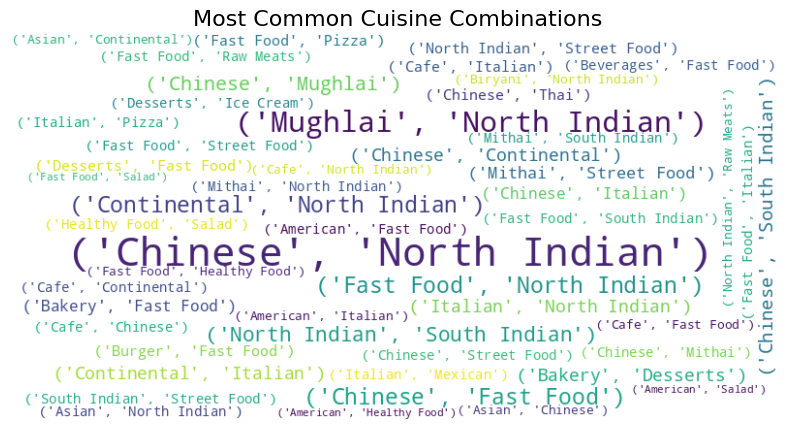

In [30]:
#Convert combination_counts keys to strings
combination_counts_str = combination_counts.to_dict()
combination_counts_str = {str(k): v for k, v in combination_counts_str.items()}

#Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis',
    max_words=50
).generate_from_frequencies(combination_counts_str)

#Display the word-cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Cuisine Combinations', fontsize=16)
plt.show()

Cuisine Combinations with Higher Average Ratings:
Cuisine Combination
American, Caribbean         4.9
BBQ, Breakfast              4.9
American, Coffee and Tea    4.9
Healthy Food, Mexican       4.9
European, Indian            4.9
Name: Aggregate rating, dtype: float64


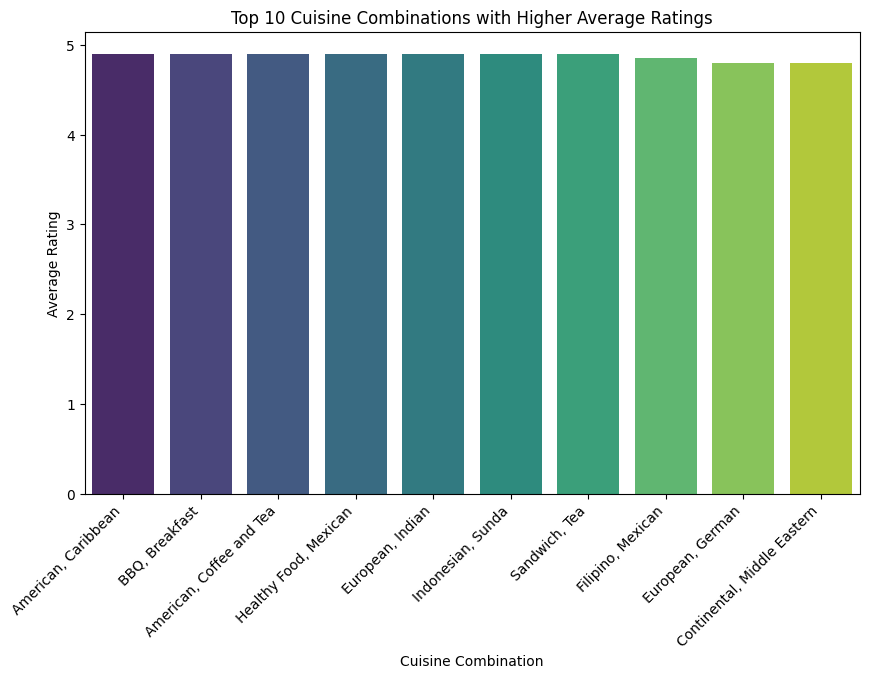

In [31]:
ratings_for_combinations = []

#For each combination, associate it with the restaurant's rating
for index, combinations in enumerate(all_combinations):
    rating = df.iloc[index]['Aggregate rating']
    for comb in combinations:
        ratings_for_combinations.append((comb, rating))

#Convert the list of combinations and ratings into a DataFrame
combinations_df = pd.DataFrame(ratings_for_combinations, columns=['Cuisine Combination', 'Aggregate rating'])

#Group by cuisine combination and calculate the average rating
average_ratings_combinations = combinations_df.groupby('Cuisine Combination')['Aggregate rating'].mean().sort_values(ascending=False)

#Convert the MultiIndex to a single-level index by joining the cuisine names
average_ratings_combinations.index = average_ratings_combinations.index.map(lambda x: ', '.join(x))

#Display the output
print("Cuisine Combinations with Higher Average Ratings:")
print(average_ratings_combinations.head())

#Top 10 cuisine combinations with the highest avg_ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings_combinations.head(10).index, y=average_ratings_combinations.head(10).values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cuisine Combination')
plt.ylabel('Average Rating')
plt.title('Top 10 Cuisine Combinations with Higher Average Ratings')
plt.show()

# Task 3: Geographic Analysis
* Plot the locations of restaurants on a
map using longitude and latitude
coordinates.
* Identify any patterns or clusters of
restaurants in specific areas.

In [32]:
#Create a map centered around the average coordinates
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

#Plot the locations on the map
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)

#Display the map
m.save('restaurant_map.html')

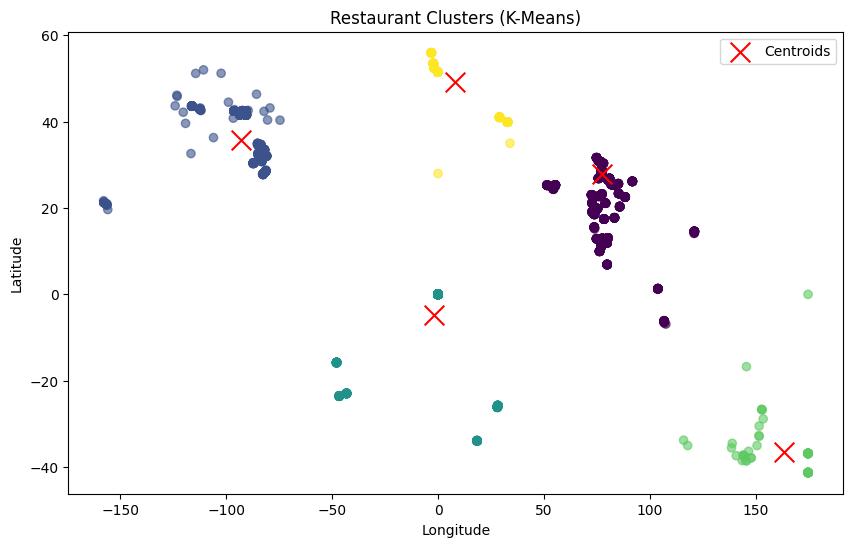

In [33]:
#Selecting only the latitude and longitude columns for clustering
coords = df[['Latitude', 'Longitude']]

#Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(coords)

#Plot the clusters using scatter plot
plt.figure(figsize=(10, 6))

#Define color for clusters
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.6)

#Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=200, label='Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Clusters (K-Means)')
plt.legend()
plt.show()

In [34]:
#Create a base map centered around the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

#Plot the clusters on the map
for index, row in df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=7,
                        color=plt.cm.viridis(df['Cluster'][index] / 5),
                        fill=True,
                        fill_opacity=0.6,
                        popup=f"Restaurant: {row['Restaurant Name']}").add_to(m)

#Add cluster centroids as red markers
for centroid in centroids:
    folium.Marker([centroid[0], centroid[1]], popup='Cluster Centroid', icon=folium.Icon(color='red')).add_to(m)

#Display the map
m.save('clustered_restaurants_map.html')

# Task 4: Restaurant Chains
* Identify if there are any restaurant chains
present in the dataset.
* Analyze the ratings and popularity of
different restaurant chains.

In [35]:
#Count occurrences of each restaurant
restaurant_counts = df['Restaurant Name'].value_counts()

#Identify restaurant chains
restaurant_chains = restaurant_counts[restaurant_counts > 1]

#Display restaurant chains
print("Restaurant Chains (appears in multiple locations):")
print(restaurant_chains)

Restaurant Chains (appears in multiple locations):
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


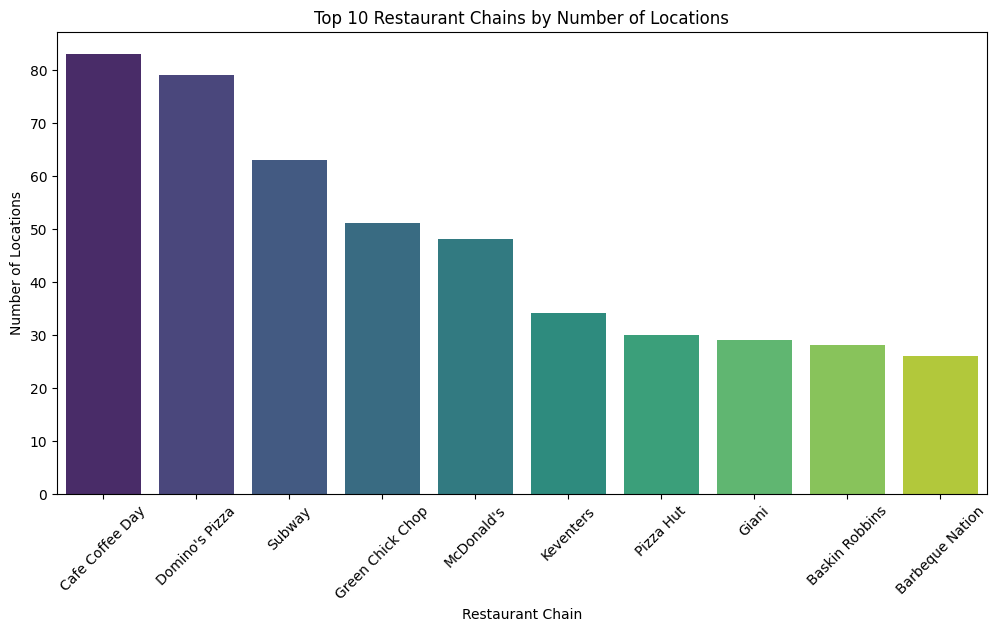

In [36]:
#Top 10 restaurant chains by count of locations
top_10_chains = restaurant_counts[restaurant_counts > 1].nlargest(10)

#Plot the restaurant chains
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_chains.index, y=top_10_chains.values, palette='viridis')

#Add labels and title
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Locations')
plt.title('Top 10 Restaurant Chains by Number of Locations')
plt.xticks(rotation=45)
plt.show()

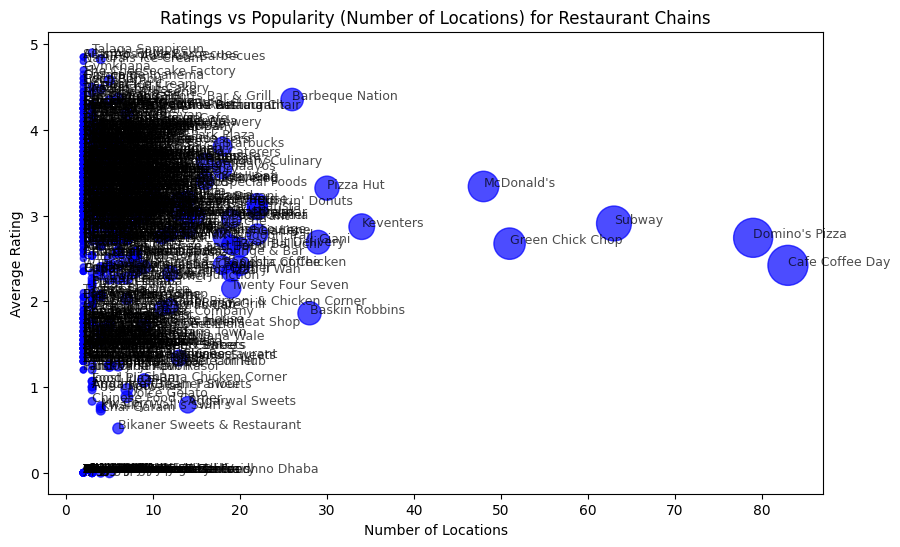

In [37]:
#Group the data by restaurant name and calculate the average rating for each chain
chain_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean()

#Get the number of locations for each chain
chain_popularity = restaurant_counts[restaurant_counts > 1]

#Merge the ratings and popularity into a single dataframe
chain_analysis = pd.DataFrame({
    'Average_Rating': chain_ratings,
    'Number_of_Locations': chain_popularity
})

#Filter to only consider chains that have more than one location
chain_analysis = chain_analysis[chain_analysis['Number_of_Locations'] > 1]

#Visualize using a scatter plot (bubble chart with ratings and popularity)
plt.figure(figsize=(10, 6))
plt.scatter(chain_analysis['Number_of_Locations'], chain_analysis['Average_Rating'], s=chain_analysis['Number_of_Locations']*10, alpha=0.7, color='b')

#Add labels and title
plt.xlabel('Number of Locations')
plt.ylabel('Average Rating')
plt.title('Ratings vs Popularity (Number of Locations) for Restaurant Chains')

#Annotate each point with the restaurant name
for i, txt in enumerate(chain_analysis.index):
    plt.annotate(txt, (chain_analysis['Number_of_Locations'].iloc[i], chain_analysis['Average_Rating'].iloc[i]), fontsize=9, alpha=0.7)

plt.show()